<a href="https://colab.research.google.com/github/raulbenitez/OUTLIER_DETETECTION/blob/main/outlier_detection_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multivariate Database:

https://archive.ics.uci.edu/ml/datasets/South+German+Credit

In [ ]:
import pandas as pd

df = pd.read_csv('/content/SouthGermanCredit.asc',sep=' ')
df.head()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,2,1,1,1


In [ ]:
df.columns

Index(['laufkont', 'laufzeit', 'moral', 'verw', 'hoehe', 'sparkont', 'beszeit',
       'rate', 'famges', 'buerge', 'wohnzeit', 'verm', 'alter', 'weitkred',
       'wohn', 'bishkred', 'beruf', 'pers', 'telef', 'gastarb', 'kredit'],
      dtype='object')

In [ ]:
df.shape

(1000, 21)

In [ ]:
df.describe()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,1.145000,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.845000,1.404000,1.963000,0.700000
std,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,0.477706,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,1.000000,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000
50%,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,1.000000,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000
75%,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,1.000000,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000
max,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,3.000000,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.000000


In [ ]:
df.describe(exclude='category')

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,1.145000,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.845000,1.404000,1.963000,0.700000
std,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,0.477706,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,1.000000,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000
50%,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,1.000000,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000
75%,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,1.000000,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000
max,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,3.000000,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.000000


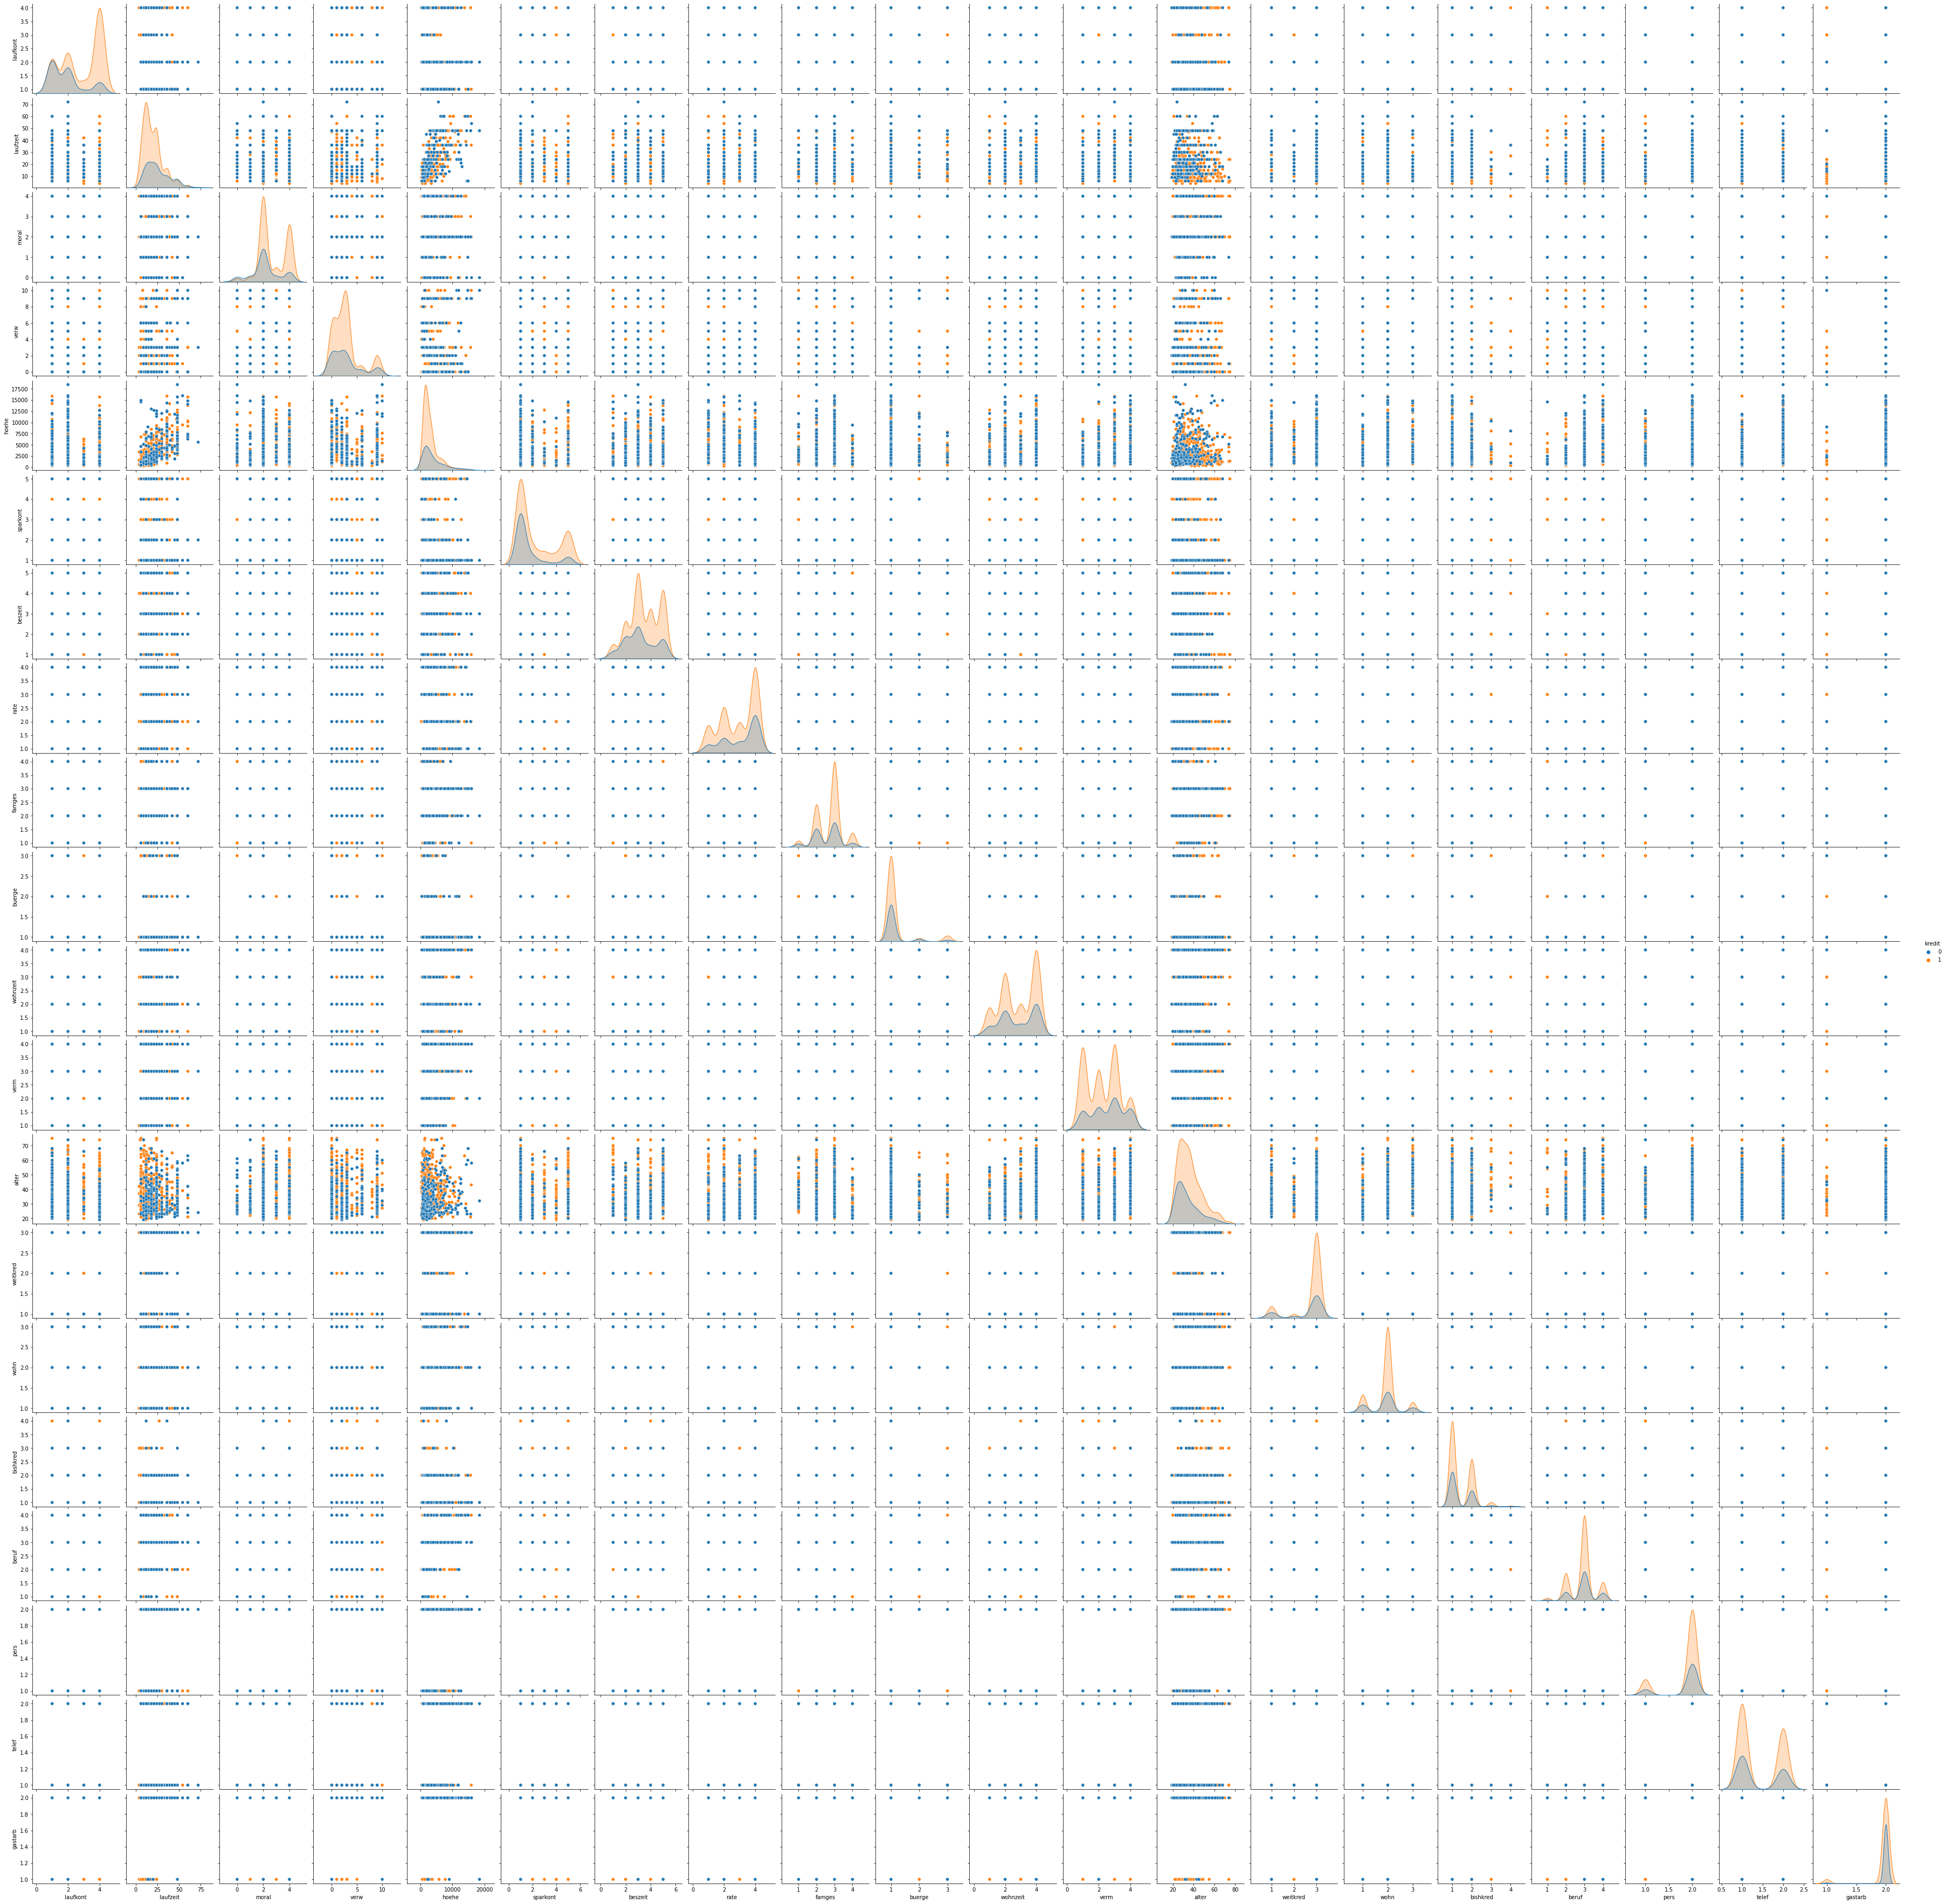

In [ ]:
import seaborn as sns

sns.pairplot(df,hue='kredit')

<function matplotlib.pyplot.show>

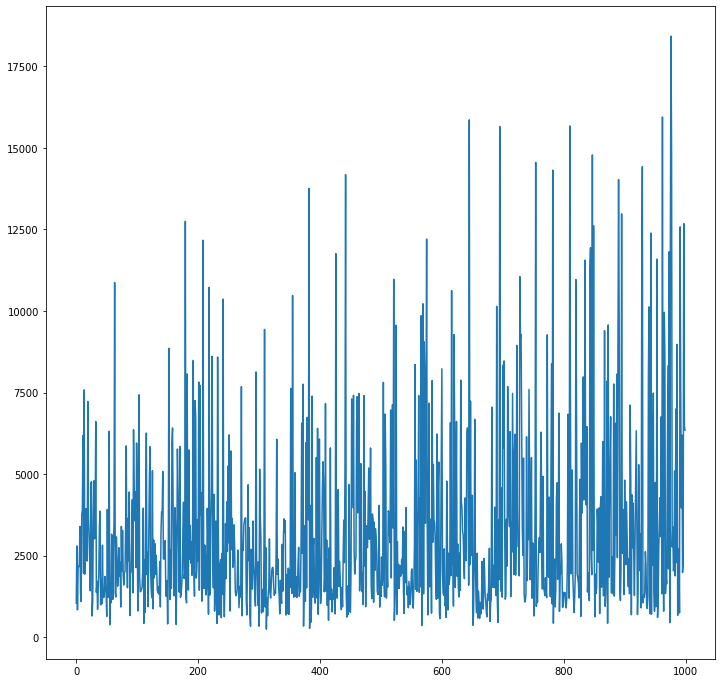

In [ ]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(12,12))
plt.plot(df['hoehe'])
plt.show

<function matplotlib.pyplot.show>

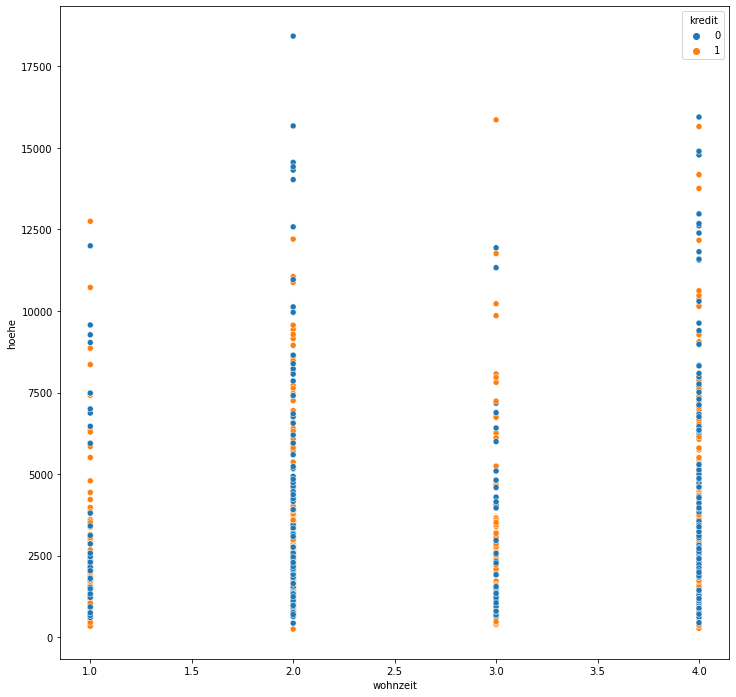

In [ ]:
import seaborn as sns

figure = plt.figure(figsize=(12,12))
sns.scatterplot(y='hoehe',x='wohnzeit',hue='kredit',data=df)
plt.show

# Statistical approaches:


## Interquantile range

$IQR = Q_3 - Q_1$,

Where $Q_i, i=1..$ are the distribution quantiles at $25\%, 50\%, 75\%$ respectively.

An observation x is an outlier if 

$ x < Q2 - 1.5*IQR$ 
 
 or if 

$ x > Q2 + 1.5*IQR$ 

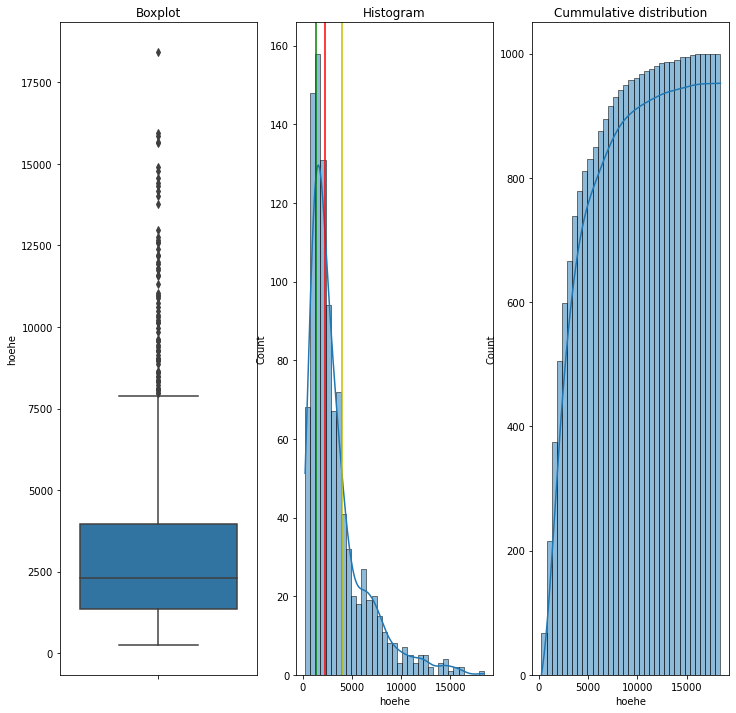

In [ ]:
Q1 = df['hoehe'].quantile(.25)
Q2 = df['hoehe'].quantile(.5)
Q3 = df['hoehe'].quantile(.75)
IQR = Q3-Q1


fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(131)
ax = sns.boxplot(y='hoehe',data=df)
ax.set_title('Boxplot')
ax1 = fig.add_subplot(132)
ax1 = sns.histplot(x='hoehe',data=df,kde=True)
ax1.set_title('Histogram')
ax1 = plt.axvline(Q1, color="g", linestyle="-")
ax1 = plt.axvline(Q2, color="r", linestyle="-")
ax1 = plt.axvline(Q3, color="y", linestyle="-")
ax2 = fig.add_subplot(133)
ax2 = sns.histplot(x='hoehe',data=df,kde=True,cumulative=True)
ax2.set_title('Cummulative distribution')
plt.show()


In [ ]:
df.loc[(df['hoehe']<Q2-1.5*IQR) | (df['hoehe']>Q2+1.5*IQR)]

SyntaxError: ignored

In [ ]:
lower_outliers = df.loc[(df['hoehe']<Q2-1.5*IQR)]
upper_outliers = df.loc[(df['hoehe']>Q2+1.5*IQR)]

n_outliers = upper_outliers.shape[0] + lower_outliers.shape[0]
n_observations = df.shape[0] 
fraction_outliers = 100*n_outliers/n_observations

print('There are {} upper outliers and {} lower outliers'.format(upper_outliers.shape[0],lower_outliers.shape[0]))
print('The {} % of the observations are outliers'.format(fraction_outliers))

There are 139 upper outliers and 0 lower outliers
The 13.9 % of the observations are outliers


# Z-score

Rescale and center the data and look for data points which are too far from zero



In [ ]:
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(df['hoehe']))
print(np.where(z > 3))
print(np.where(z < 3))



(array([179, 208, 382, 426, 442, 575, 645, 695, 754, 782, 810, 844, 847,
       849, 890, 895, 929, 943, 962, 973, 975, 976, 977, 991, 997]),)
(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 15

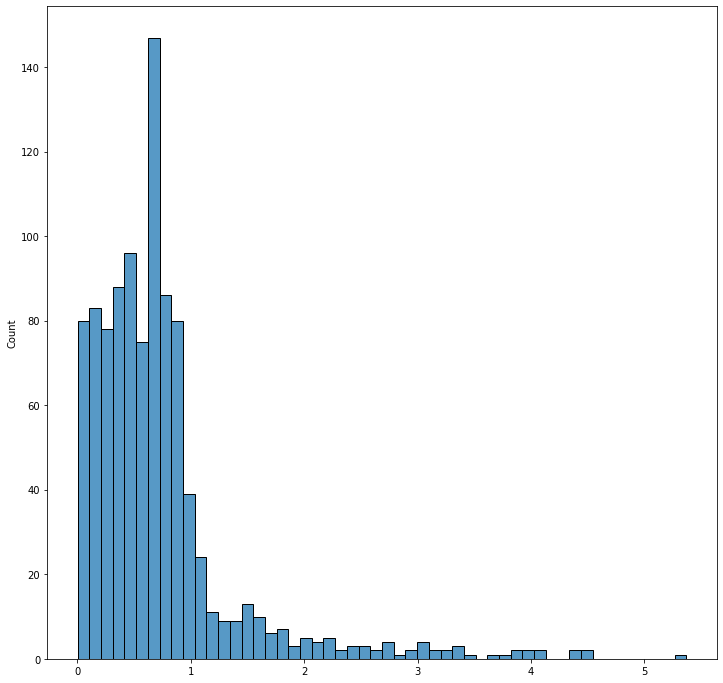

In [ ]:
fig = plt.figure(figsize=(12,12))
sns.histplot(z)


Mutual Information: Measuring how imbalanced is a categorical variable

You could use the Shannon entropy as a measure of balance.

Consider a set of n observations of a categorical variable that can take k possible values  If there are $c_i$ observations for each of the k possible values, the Shannon's entropy of the variable is given by: 

$H = - \sum_{i=1}^k p_i \log_2(p_i)$

where p_i = \frac{c_i}{n} is the probability of value k and H is measured in bits per value. 

Shannon's entropy takes a value 0 when there is one single class (completely umbalanced, lowest entropy, maximum predicibility) and 1 when all classes are equally represented (balanced variable, maximum entropy, highest uncertainty).